<a href="https://colab.research.google.com/github/Normalita06/Praktikum_DataMining/blob/main/datamining_Evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PENELITIAN STATISTIK PENGARUH KESEHATAN MENTAL PADA MAHASISWA**

# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn import metrics

#**Business Understanding**

##**Business Objective**

Analisis ini bertujuan untuk melihat pola dan korelasi yang dapat menjadi masukan bagi intervensi yang ditargetkan dan sistem dukungan. Selain itu, memahami dan memberikan pemahaman bagaimana usia, status, nilai akademik, dan status depresi saling terkait memberikan perspektiif holistik, menumbuhkan apresiasi yang lebih dalam terhadap tantangan dan keberhasilan yang mungkin dihadapi siswa selama perjalanan pendidikan mereka.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah kurangnya kesadaran pada kesehatan mental yang berimbas minimnya rasa kepedulian serta apresiasi kepada para siswa yang tengah menghadapi tantangan akademik.

##**Data Mining Goals**

Tujuan dari menavigasi kumpulan data ini adalah untuk menyumbangkan wawasan bermakna yang diiharapkan akan meningkatkan pemahaman kita tentang dinamika siswa namun juga meletakkan dasar untuk mengembangkan strategi yang disesuaikan untuk mendukung kesejahteraan siswa dan keberhasilan akademik.

##**Project Plan**

Dengan mengumpulkan data selanjutnya, data-data diidentifikasi dan dieksplorasi untuk mengindentifikasi korelasi dan hubungan antar variabel. Selain itu, data akan dinilai dan masalah data akan diidentifikasi agar dapat diatasi dalam tahapan berikutnya.

#**DATA UNDERSTANDING**


##**Collect Initial Data**

Sumber data yang digunakan diambil dari website Kaggle. Kaggle merupakan platform yang menyediakan berbagai dataset untuk keperluan kompetisi data science, proyek-proyek belajar, dan penelitian. data-data dari website Kaggle biasanya berasal dari berbagai sumber, termasuk institusi akademik, perusahaan, organisasi non-profit, dan individu yang menyumbangkan dataset mereka.

berikut link dataset yang digunakan pada project kali ini : https://www.kaggle.com/datasets/shariful07/student-mental-health

In [2]:
df = pd.read_csv('StudentMentalhealth.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


##**Describe Data**

####Informasi Data

In [3]:
print("Baris :",df.shape[0])
print("Kolom :",df.shape[1])

Baris : 101
Kolom : 11


dari dataset menampilkan jumlah baris dan jumlah kolom, yaitu jumlah baris 101 dan jumlah kolom 11.

####Informasi Lanjutan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

diatas menampilkan jumlah kolom dari dataset yang berjumlah 11 dan spesifikasi dari dataset yang ada.

1. Timestamp : kolom yang berisi tanggal dan waktu. jumlah non-null adalah 101 dan tipe datanya object.

2. Choose your gender : kolom yang berisikan data gender. jumlah non-null adalah 101 dan tipe datanya object.

3. Age : kolom yang berisi data umur/usia. jumlah non-null adalah 100 dan tipe datanya float64.

4. What is your course : kolom yang berisikan penjurusan yang diambil. jumlah non-null adalah 101 dan tipe datanya object.

5. Your current year of Study : kolom yang berisikan data berapa lama dalam penjurusan. jumlah 101 non-null dengan tipedata object

6. What is your CGPA? : kolom yang berisikan data rata-rata nilai. jumlah non-null 101, tipedata object

7. Marital status : kolom yang berisikan data status kelajangan. jumlah 101 non-null, tipedata object

8. Do you have Depression? : kolom yang berisikan data yes/no dari pertanyaan tersebut. jumlah non-null 101, tipedata object

9. Do you have Anxiety? : kolom yang berisikan data yes/no dari pertanyaan tersebut. jumlah non-null 101, tipedata object

10. Do you have Panic attack? : kolom yang berisikan data yes/no dari pertanyaan tersebut. jumlah non-null 101, tipedata object

11. Did you seek any specialist for a treatment? : kolom yang berisikan data yes/no dari pertanyaan tersebut. jumlah non-null 101, tipedata object

####Informasi Statistik Deskriptif

In [5]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


nilai rata-rata dari usia adalah 20.53000 dengan standar deviasi sekitar 2.49628. Nilai minimum adalah 18.00000 dan maximum 24.00000

##**Exploratory Data Analysis**

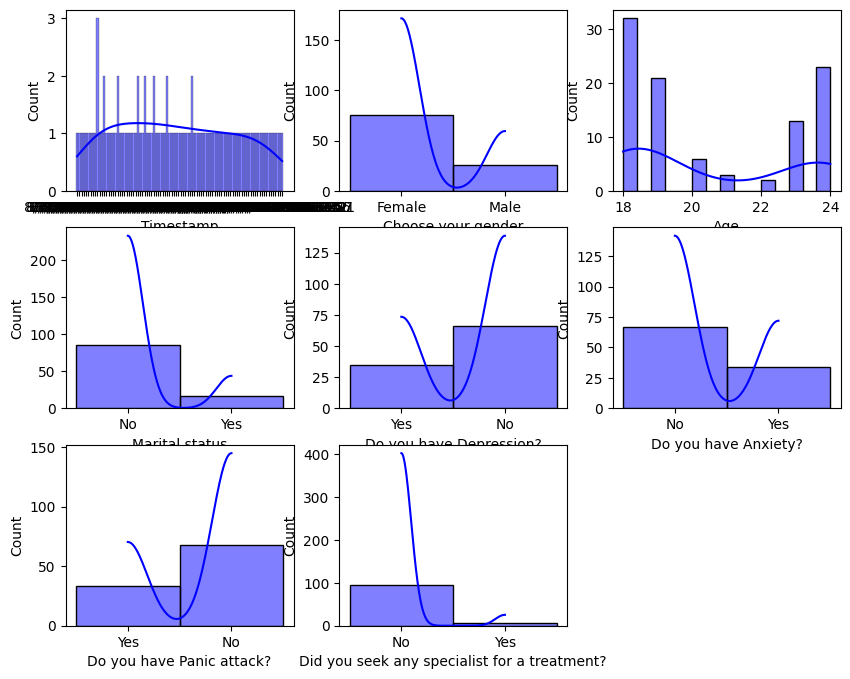

In [6]:
df = pd.read_csv('StudentMentalhealth.csv')

#Define the list of columns to visualize
columns = ['Timestamp', 'Choose your gender', 'Age', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

#Create the plot
plt.figure(figsize=(10, 8))

for i, Quality in enumerate(columns):
  plt.subplot(3, 3, i + 1)
  sns.histplot(data=df, x=Quality, kde=True, bins=15, color='blue')

plt.show()

dari visualisasi diatas dapat membantu dalam memahami karakteristik responden dan memberikan wawasan atau informasi persentase tingkat kondisi kesehatan mental yang dialami dalam rentang usia, gender, status, dan berapa yang mencari bantuan dari spesialis untuk pengobatan.

ini dapat memberikan informasi tentang tingkat kesadaran dan aksesibilitas layanan kesehatan mental di antara mereka.

##**Verify Data Quality**

####Missing Values

In [7]:
data = pd.read_csv('StudentMentalhealth.csv')

#mengecek apakah ada nilai kosong pada tiap kolom
missing_values = data.isnull().sum()

#menampilkan jumlah nilai kosong pada tiap kolom
print(missing_values)

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


tampilan diatas menyatakan bahwa ada 1 nilai kosong yang terdapat pada kolom 'Age'. nilai nol pada kolom lainnya menyatakan tidak ada nilai kosong pada kolom tersebut.

####Outliers Values

In [8]:
#mendefinisikan fungsi untuk mendeteksi outliers dan menghitung persentase
def detect_outliers(column):
  #convert the column to a numeric data type
  column = pd.to_numeric(column, errors='coerce')

  #remove NaN values
  column = column.dropna()

  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1

  #detect outliers
  outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

  #calculate the percentage of outliers
  percentage_outliers = outliers.sum() / len(column) * 100

  return outliers, percentage_outliers

#loop untuk setiap kolom
for column in df.columns:
  outliers, percentage_outliers = detect_outliers(df[column])

  print(f"Kolom '{column}':")
  print(f" - Jumlah outliers: {outliers.sum()}")
  print(f" - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
  print()

Kolom 'Timestamp':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Choose your gender':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Age':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: 0.00%

Kolom 'What is your course?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Your current year of Study':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'What is your CGPA?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Marital status':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Do you have Depression?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Do you have Anxiety?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Do you have Panic attack?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Did you seek any specialist for a treatment?':
 - Jumlah outliers: 0
 - Persentase kehadiran out

<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in sc

dari hasil diatas dapat dilihat, bahwa menyatakan tidak ada nilai duplikat pada data

####Duplicated Values

In [9]:
duplicates_by_values = df.duplicated().sum()
print(duplicates_by_values)

0


hasil duplikat menyatakan nol (0)

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [10]:
print((df.isna().sum() / len(df)) * 100)

Timestamp                                       0.000000
Choose your gender                              0.000000
Age                                             0.990099
What is your course?                            0.000000
Your current year of Study                      0.000000
What is your CGPA?                              0.000000
Marital status                                  0.000000
Do you have Depression?                         0.000000
Do you have Anxiety?                            0.000000
Do you have Panic attack?                       0.000000
Did you seek any specialist for a treatment?    0.000000
dtype: float64


Dari output di atas, dapat dilihat bahwa kolom "Age" adalah satu-satunya kolom yang memiliki nilai yang kosong dengan sekitar 0.99% dari total baris DataFrame.

In [11]:
df[df['Age'].isnull()]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


(NaN) menunjukkan nilai yang kosong.

#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom Age tidak lebih dari 70%, maka kolom tersebut tidak harus dihapus.

#####**Imputasi Missing Values**

Untuk kolom Age, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom Age.

In [12]:
df['Age'].dropna().describe()

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom Age untuk imputasi nilai kosong tersebut.

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].dropna().mean())

Syntax diatas digunakan untuk mengisi nilai yang kosong(NaN) dalam kolom "Age" dengan nilai rata-rata dari nilai yang valid dalam kolom.

df['Age'].dropna(): untuk menghapus semua nilai NaN dari kolom "Age". Hasilnya adalah sebuah Series yang hanya berisi nilai-nilai yang valid.

.mean(): untuk menghitung rata-rata dari nilai-nilai yang valid dalam kolom "Age".

df['Age'].fillna(...): untuk mengisi nilai-nilai NaN dalam kolom "Age" dengan nilai rata-rata yang telah dihitung sebelumnya.

#####**Pengecekkan Ulang**

In [14]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Timestamp,0.0
Choose your gender,0.0
Age,0.0
What is your course?,0.0
Your current year of Study,0.0
What is your CGPA?,0.0
Marital status,0.0
Do you have Depression?,0.0
Do you have Anxiety?,0.0
Do you have Panic attack?,0.0


Setelah kita mengisi nilai yang kosong, kita melakukan pengecekkan ulang dan diatas menampilkan bahwa persentase pada kolom "Age" sudah 0.0 yang artinya sudah tidak ada lagi nilai kosong pada kolom tersebut.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

Pengecekkan nilai duplikat adalah proses untuk memeriksa apakah terdapat baris-baris dalam dataset yang memiliki nilai yang sama di semua kolomnya.

In [15]:
df[df.duplicated()]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?


Karena pengecekkan menunjukkan tidak ada nilai duplikat, maka tidak ada nilai duplikat yang harus dihapus.

#####**Hapus Nilai Duplikat**

tidak ada nilai duplikat yang harus dihapus.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

Pengecekkan outliers adalah proses identifikasi nilai-nilai ekstrem yang berbeda secara signifikan dari sebuah dataset. Pengecekkan outliers penting karena dapat mempengaruhi analisis statistik dan model prediktif.

In [16]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom' : col, 'Persentase Outliers' : percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,0.0


Dalam pengecekkan outliers diatas menunjukkan pada kolom "Age" tidak memiliki persentase outliers. Dengan demikian, kolom "Age" dalam dataset tidak memiliki nilai yang secara signifikan berbeda dari sebagian besar data lainnya, maka tidak ada nilai pada kolom yang perlu di drop atau dihapus.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

Proses dimana kita akan membuat fitur-fitur baru dalam dataset untuk meningkatkan kinerja model machine learning.

In [17]:
def categorize_age(age):
  if age < 18:
    return 'Child'
  elif 18 <= age < 60:
    return 'Adult'
  else:
    return 'Elderly'

df['AgeCategory'] = df['Age'].apply(categorize_age)

diatas kita buat fungsi "categorize_age" yang akan mengategorikan usia 'Child' untuk usia di bawah 18 tahun, 'Adult' untuk usia antara 18 dan 59 tahun, dan 'Elderly' untuk usia 60 tahun ke atas.

###**Pengecekkan Hasil**

In [18]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,Adult
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,Adult
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,Adult
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,Adult
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,Adult


Hasilnya akan tertampil seperti diatas, seperti penjelasan sebelumnya perhatikan kolom "Age" dan "AgeCategory".

#**Data Reduction**

####**Mengurangi Fitur-fitur yang kurang relevan**

In [19]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

diatas menampilkan dan menghitung korelasi antar kolom yang bersifat numeric saja. Karena hanya 1 kolom saja pada data kita yang bersifat numeric dan kolom tersebut termasuk relevan maka tidak ada pengurangan dalam dataframe.

#**Data Transformation**

###**Mapping**

Mapping merupakan proses meghubungkan nilai dari satu set data ke nilai set data lainnya, mengubah nilai dari satu format ke format lainnya atau menghubungkan nilai dalam satu dataset dengan nilai dalam dataset lain.

In [20]:
df['Choose your gender'] = df['Choose your gender'].map({'Male':1, 'Female':0}).astype(int)
df['AgeCategory'] = df['AgeCategory'].map({'Child':0, 'Adult':1, 'Elder':2}).astype(int)
df['Do you have Depression?'] = df['Do you have Depression?'].map({'Yes':1, 'No':0}).astype(int)
df['Do you have Anxiety?'] = df['Do you have Anxiety?'].map({'Yes':1, 'No':0}).astype(int)
df['Do you have Panic attack?'] = df['Do you have Panic attack?'].map({'Yes':1, 'No':0}).astype(int)
df['Did you seek any specialist for a treatment?'] = df['Did you seek any specialist for a treatment?'].map({'Yes':1, 'No':0}).astype(int)

pada syntax baris pertama, mengubah nilai dalam kolom 'Choose your gender' dari string 'Male' menjadi 1 dan string 'Female' menjadi 0.

begitu juga dengan baris selanjutnya merubah nilai pada kolom yang sebelumnya string menjadi numeric.

In [21]:
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory
0,8/7/2020 12:02,0,18.0,Engineering,year 1,3.00 - 3.49,No,1,0,1,0,1
1,8/7/2020 12:04,1,21.0,Islamic education,year 2,3.00 - 3.49,No,0,1,0,0,1
2,8/7/2020 12:05,1,19.0,BIT,Year 1,3.00 - 3.49,No,1,1,1,0,1
3,8/7/2020 12:06,0,22.0,Laws,year 3,3.00 - 3.49,Yes,1,0,0,0,1
4,8/7/2020 12:13,1,23.0,Mathemathics,year 4,3.00 - 3.49,No,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,0,21.0,BCS,year 1,3.50 - 4.00,No,0,1,0,0,1
97,13/07/2020 21:21:42,1,18.0,Engineering,Year 2,3.00 - 3.49,No,1,1,0,0,1
98,13/07/2020 21:22:56,0,19.0,Nursing,Year 3,3.50 - 4.00,Yes,1,0,1,0,1
99,13/07/2020 21:23:57,0,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,0,0,0,0,1


###**Encoding**

Encoding adalah sebuah proses mengonversi data dari satu bentuk ke bentuk lain.

In [22]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [23]:
df.head()

,Choose your gender,Age,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory,Timestamp_13/07/2020 10:07:32,Timestamp_13/07/2020 10:10:30,Timestamp_13/07/2020 10:11:26,...,Your current year of Study_year 3,Your current year of Study_year 4,What is your CGPA?_0 - 1.99,What is your CGPA?_2.00 - 2.49,What is your CGPA?_2.50 - 2.99,What is your CGPA?_3.00 - 3.49,What is your CGPA?_3.50 - 4.00,What is your CGPA?_3.50 - 4.00,Marital status_No,Marital status_Yes
0,0,18.0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,21.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,19.0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,22.0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,1,23.0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


 di atas adalah hasil dari proses one-hot encoding yang telah dilakukan pada DataFrame. Setiap kolom dalam output mewakili nilai unik dari kolom kategorikal dalam dataset asli dan nilai-nilai tersebut telah diubah menjadi representasi numerik biner. Misalnya, kolom "Choose your gender" yang awalnya memiliki nilai 'Male' dan 'Female', sekarang terpisah menjadi dua kolom baru yaitu "Choose your gender_0" untuk nilai 'Male' dan "Choose your gender_1" untuk nilai 'Female'. Jika baris tersebut adalah 'Male', kolom "Choose your gender_0" akan bernilai 1 dan "Choose your gender_1" akan bernilai 0, dan sebaliknya jika baris tersebut adalah 'Female'.

bisa dilihat juga bahwa setiap nilai unik dari kolom kategorikal telah diubah menjadi kolom baru dengan representasi numerik biner.

#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

Split data adalah proses membagi dataset menjadi subset yang lebih kecil untuk digunakan dalam pelatihan, validasi, dan pengujian model machine learning. Split data dilakukan untuk menghindari overfitting (ketika model terlalu "menghafal" data latih dan tidak bisa umum) dan untuk mengevaluasi kinerja model dengan benar.

In [24]:
x = df.drop('Do you have Depression?', axis=1)
y = df['Do you have Depression?']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#####**Normalisasi Data**

Normalisasi data adalah proses mengubah skala nilai-nilai dalam dataset sehingga mereka memiliki rentang yang seragam.

Salah satu metode normalisasi yang umum digunakan adalah Min-Max Scaling, di mana nilai-nilai dalam dataset diubah menjadi rentang antara 0 dan 1. Proses normalisasi ini dapat membantu meningkatkan kinerja algoritma machine learning, terutama algoritma yang sensitif terhadap skala, seperti regresi linear dan k-nearest neighbors (KNN).

In [25]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

###**Build and Train Model**

#####**Gaussian Naive Bayes**

Gaussian Naive Bayes (GNB) adalah salah satu metode klasifikasi yang berbasis pada Teorema Bayes dengan asumsi bahwa nilai-nilai fitur dalam setiap kelas mengikuti distribusi Gaussian (normal distribution).

gnb = GaussianNB() digunakan untuk membuat objek model GNB yang siap untuk digunakan. Kemudian, gnb.fit(x_train_norm, y_train) digunakan untuk melatih model GNB menggunakan data latih yang telah dinormalisasi (x_train_norm) dan target yang sesuai (y_train).

In [26]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

#####**K-Nearest Neighbor**

Algoritma ini bekerja dengan cara menemukan kelas mayoritas dari k titik tetangga terdekat untuk setiap titik data yang akan diprediksi.

knn = KNeighborsClassifier() digunakan untuk membuat objek model KNN yang siap untuk digunakan. Kemudian, knn.fit(x_train_norm, y_train) digunakan untuk melatih model KNN menggunakan data latih yang telah dinormalisasi (x_train_norm) dan target yang sesuai (y_train).

In [27]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#####**Decision Tree**

Decision Tree (pohon keputusan) adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. Algoritma ini menggunakan struktur pohon yang terdiri dari simpul (node) dan cabang (branch) untuk menggambarkan keputusan dan konsekuensinya.

In [28]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

###**Begins and Compare Predict**

In [29]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [30]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [31]:
combined_data.head()

,Choose your gender,Age,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory,Timestamp_13/07/2020 10:07:32,Timestamp_13/07/2020 10:10:30,Timestamp_13/07/2020 10:11:26,Timestamp_13/07/2020 10:12:18,...,What is your CGPA?_2.50 - 2.99,What is your CGPA?_3.00 - 3.49,What is your CGPA?_3.50 - 4.00,What is your CGPA?_3.50 - 4.00,Marital status_No,Marital status_Yes,Do you have Depression?,gnb_prediction,knn_prediction,dtc_prediction
0,1,23.0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,21.0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,18.0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1,19.0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,1,1
4,1,18.0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


Output yang ditampilkan adalah DataFrame combined_data yang berisi data pengujian, target sebenarnya, dan hasil prediksi dari ketiga model (Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree). Dalam output tersebut, setiap baris mewakili satu sampel data pengujian, dan kolom "gnb_prediction", "knn_prediction", dan "dtc_prediction" berisi prediksi dari masing-masing model untuk sampel tersebut.

#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

Adjustment merujuk pada proses penyesuaian atau perubahan yang dilakukan pada data atau model untuk meningkatkan kinerja dan hasil akhir.

In [32]:
x_final = df.drop("Do you have Depression?", axis=1)

Syntax x_final = df.drop("Do you have Depression?", axis=1) digunakan untuk menghasilkan DataFrame baru (x_final) dengan menghapus kolom "Do you have Depression?" dari DataFrame awal (df). Parameter axis=1 digunakan untuk menunjukkan bahwa yang akan dihapus adalah kolom, bukan baris. Dengan demikian, DataFrame x_final akan berisi semua kolom dari df kecuali kolom "Do you have Depression?"

#####**Normalisasi Data**

In [33]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

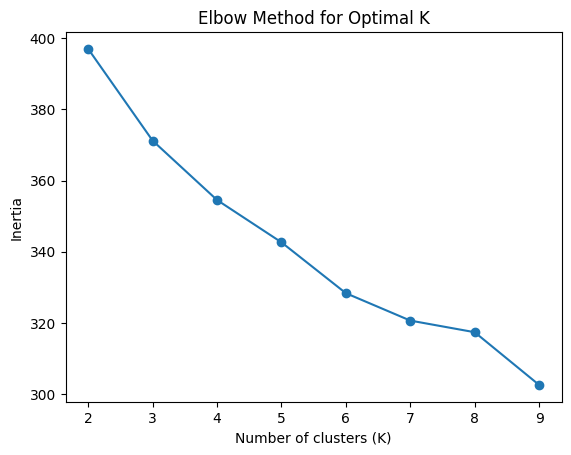

In [34]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Output yang ditampilkan adalah plot yang menunjukkan nilai inertia pada setiap nilai K yang dicoba. Dari plot tersebut, Anda dapat mencari titik di mana penambahan cluster tidak memberikan penurunan yang signifikan dalam inertia, yang dapat dianggap sebagai jumlah cluster yang optimal. Dalam hal ini, Anda mencoba nilai K dari 2 hingga 9 untuk menemukan titik "elbow" di mana penurunan inertia tidak signifikan lagi.

###**Build Model**

#####**K-Means**

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

Output tersebut adalah pesan peringatan (warning) yang dikeluarkan oleh library scikit-learn terkait dengan parameter n_init pada algoritma KMeans. Pesan tersebut memberi tahu bahwa nilai default n_init akan berubah dari 10 menjadi 'auto' pada versi 1.4 dari scikit-learn. Untuk menghindari pesan peringatan ini, disarankan untuk secara eksplisit menentukan nilai n_init saat membuat objek KMeans.

#####**Hierarchical Clustering**

Syntax ini digunakan untuk membuat objek clustering menggunakan metode Hierarchical Clustering dengan algoritma Agglomerative Clustering.

In [36]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')



*   AgglomerativeClustering: Merupakan kelas dalam library scikit-learn yang digunakan untuk melakukan Hierarchical Clustering dengan pendekatan agglomerative.
*   n_clusters=4: Parameter ini menentukan jumlah cluster yang ingin dibentuk.
affinity='euclidean': Parameter ini menentukan metrik jarak yang digunakan untuk mengukur kedekatan antara dua sampel. Dalam hal ini, menggunakan metrik jarak euclidean.

*   linkage='ward': Parameter ini menentukan metode penggabungan cluster. 'ward' menggabungkan cluster berdasarkan peningkatan jumlah varians yang paling kecil saat dua cluster digabungkan.

###**Begins and Compare Clusters**

In [37]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Output yang diberikan adalah sebuah peringatan bahwa parameter affinity pada model Agglomerative Clustering telah didepresiasi (deprecated) mulai dari versi 1.2 dan akan dihapus pada versi 1.4. Peringatan ini menginformasikan bahwa penggunaan parameter affinity pada saat yang akan datang akan digantikan dengan parameter metric, yang memiliki fungsi yang sama namun menggunakan istilah yang lebih umum dan konsisten dalam konteks clustering.

In [38]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [39]:
combined_data_assoc.head()

,Choose your gender,Age,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory,Timestamp_13/07/2020 10:07:32,Timestamp_13/07/2020 10:10:30,Timestamp_13/07/2020 10:11:26,Timestamp_13/07/2020 10:12:18,...,What is your CGPA?_0 - 1.99,What is your CGPA?_2.00 - 2.49,What is your CGPA?_2.50 - 2.99,What is your CGPA?_3.00 - 3.49,What is your CGPA?_3.50 - 4.00,What is your CGPA?_3.50 - 4.00,Marital status_No,Marital status_Yes,kmeans_cluster,hierarchy_cluster
0,0,18.0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,3,1
1,1,21.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,2,1
2,1,19.0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,2,1
3,0,22.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
4,1,23.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,2,1


Syntax diatas untuk menggabungkan hasil clustering ke dalam dataframe.

Output yang diberikan adalah DataFrame combined_data_assoc yang berisi data asli (x_final) beserta kolom "kmeans_cluster" dan "hierarchy_cluster" yang berisi label cluster dari masing-masing model clustering. Setiap baris pada DataFrame mewakili satu data, dan kolom "kmeans_cluster" dan "hierarchy_cluster" berisi label cluster yang telah diprediksi.

#**Tensorflow Classification (Extras)**

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(x_train_norm, y_train, epochs=10, batch_size=32, validation_data=(x_test_norm, y_test))

Epoch 1/10
3/3 [==============================] - 1s 118ms/step - loss: 0.6664 - accuracy: 0.3429 - val_loss: 0.6461 - val_accuracy: 0.3548
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6429 - accuracy: 0.3429 - val_loss: 0.6382 - val_accuracy: 0.3548
Epoch 3/10
3/3 [==============================] - 0s 26ms/step - loss: 0.6246 - accuracy: 0.3429 - val_loss: 0.6332 - val_accuracy: 0.3548
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6099 - accuracy: 0.3429 - val_loss: 0.6286 - val_accuracy: 0.3548
Epoch 5/10
3/3 [==============================] - 0s 26ms/step - loss: 0.5958 - accuracy: 0.3429 - val_loss: 0.6222 - val_accuracy: 0.3548
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.5806 - accuracy: 0.3429 - val_loss: 0.6148 - val_accuracy: 0.3548
Epoch 7/10
3/3 [==============================] - 0s 19ms/step - loss: 0.5639 - accuracy: 0.3429 - val_loss: 0.6072 - val_accuracy: 0.3548
Epoch 8/10
3/3 [==========

In [44]:
tf_pred_prob = model.predict(x_test_norm)

tf_pred = np.argmax(tf_pred_prob, axis=1)

tf_col = pd.DataFrame(tf_pred, columns=["tf_prediction"])

final_data = pd.concat([combined_data, tf_col], axis=1)

1/1 [==============================] - 0s 92ms/step


In [45]:
final_data

,Choose your gender,Age,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory,Timestamp_13/07/2020 10:07:32,Timestamp_13/07/2020 10:10:30,Timestamp_13/07/2020 10:11:26,Timestamp_13/07/2020 10:12:18,...,What is your CGPA?_3.00 - 3.49,What is your CGPA?_3.50 - 4.00,What is your CGPA?_3.50 - 4.00,Marital status_No,Marital status_Yes,Do you have Depression?,gnb_prediction,knn_prediction,dtc_prediction,tf_prediction
0,1,23.0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,1,21.0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0,18.0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,1,19.0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0
4,1,18.0,1,1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
5,0,24.0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,0
6,0,24.0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7,1,23.0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
8,0,20.0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
9,0,18.0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0


#**Evaluation**

##**Evaluate Results**

###**Klasifikasi**

Klasifikasi merupakan proses pengelompokkan data ke dalam kategori atau kelas berdasarkan fitur-fitur yang ada dalam data yang bertujuan untuk memprediksi kelas atau label dari data baru berdasarkan dari data yang dikelompokkan sebelumnya.

beberapa algoritma yang umum digunakan termasuk Decision Tree, Naive Bayes, K-Nearest Neighbors dan Support Vector Machines.

Gaussian Naive Bayes

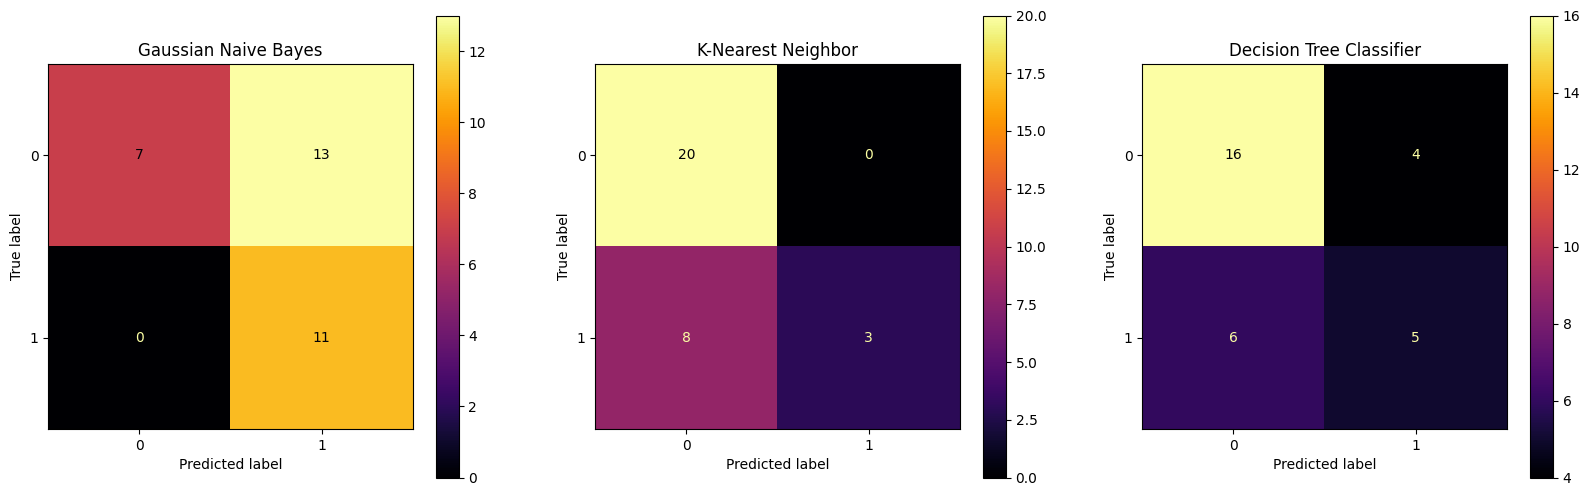

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Kolom Target : 'Do you have Depression?'

1 (Yes) 0 (No)

Output di atas menampilkan matriks kebingungan (confusion matrices) untuk tiga algoritma klasifikasi pembelajaran mesin yang berbeda: Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree Classifier. Ketiga algoritma ini digunakan untuk memprediksi apakah individu mengalami depresi berdasarkan data yang diberikan.

Matriks kebingungan ini menunjukkan performa ketiga model pembelajaran mesin dalam memprediksi depresi, dan menarik untuk dibandingkan secara visual.

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = gnb_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, gnb_pred)
print("nilai akurasi gnb : ", accuracy)
print("nilai presisi gnb : ", precision)
print("nilai recall gnb : ", recall)
print("nilai f1-score gnb : ", f1_score)
print("nilai roc gnb : ", roc_score)

nilai akurasi gnb :  0.5806451612903226
nilai presisi gnb :  0.4583333333333333
nilai recall gnb :  1.0
nilai f1-score gnb :  0.6285714285714286
nilai roc gnb :  0.675


**Mengenai output diatas :**
1. **Akurasi (Accuracy)**: Nilai akurasi mengukur sejauh mana model dapat memprediksi dengan benar. Nilai akurasi GNB (Gaussian Naive Bayes) adalah **0.58**. Ini berarti sekitar 58% prediksi yang dilakukan oleh model GNB benar.

2. **Presisi (Precision)**: Presisi mengukur seberapa baik model dalam mengidentifikasi positif sejati (true positive) dari semua prediksi positif. Nilai presisi GNB adalah **0.46**. Ini menunjukkan bahwa dari semua prediksi positif yang dilakukan oleh model GNB, hanya sekitar 46% yang benar-benar positif.

3. **Recall (Sensitivity)**: Recall mengukur seberapa baik model dalam mengidentifikasi semua kasus positif sejati. Nilai recall GNB adalah **1.0**. Ini berarti model GNB dapat mengenali semua kasus positif yang ada.

4. **F1-Score**: F1-score adalah rata-rata harmonis antara presisi dan recall. Nilai F1-score GNB adalah **0.63**. Semakin tinggi nilai F1-score, semakin baik keseimbangan antara presisi dan recall.

5. **ROC (Receiver Operating Characteristic) Score**: ROC score mengukur kinerja model dalam membedakan antara kelas positif dan negatif. Nilai ROC GNB adalah **0.68**. Semakin tinggi nilai ROC, semakin baik model dalam membedakan antara kedua kelas.

Semua nilai ini memberikan gambaran tentang performa model GNB dalam memprediksi depresi berdasarkan data yang diberikan. Namun, perlu diperhatikan bahwa interpretasi nilai-nilai ini harus dilakukan dengan mempertimbangkan konteks dan tujuan penggunaan model tersebut.

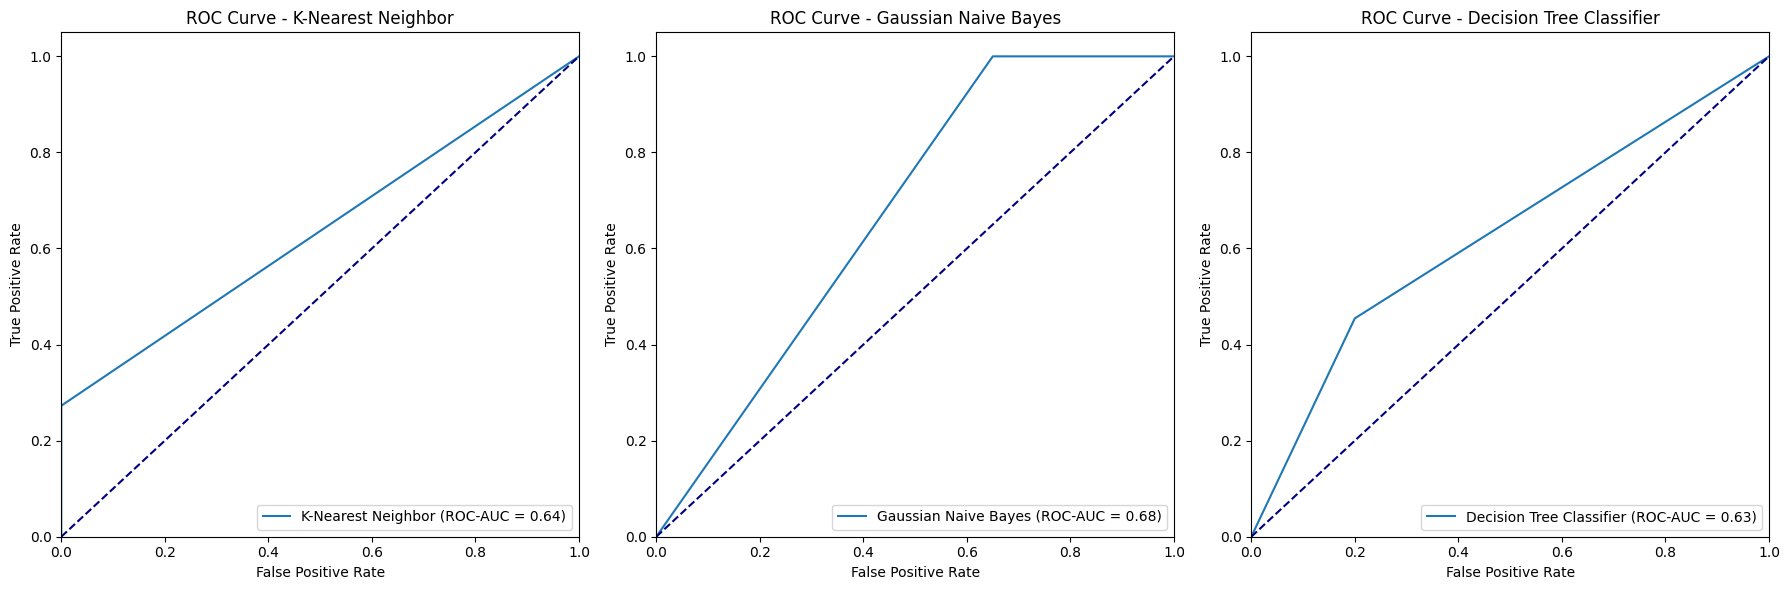

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Gambar di atas menampilkan tiga kurva **Receiver Operating Characteristic (ROC)** untuk tiga model pembelajaran mesin yang berbeda: **K-Nearest Neighbor**, **Gaussian Naive Bayes**, dan **Decision Tree Classifier**. Setiap plot menunjukkan **True Positive Rate** (Tingkat Positif Sejati) terhadap **False Positive Rate** (Tingkat Positif Palsu), dengan garis putus-putus diagonal mewakili klasifikasi acak dan garis solid menunjukkan performa masing-masing model. Nilai **Area Under Curve (AUC)** adalah 0.641, 0.687, dan 0.653 secara berurutan.

##**Review Process**

###**Cross Validation**

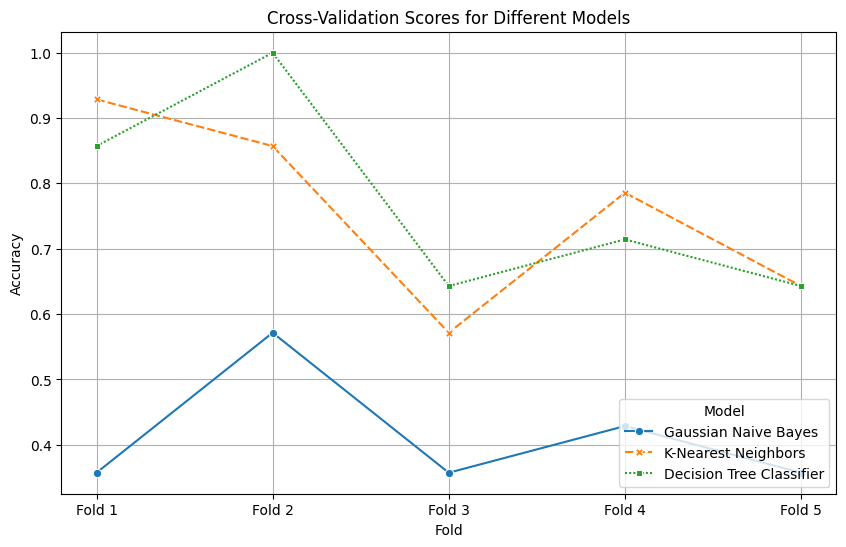

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Gambar di atas menampilkan grafik yang menunjukkan **skor validasi silang** (cross-validation scores) untuk tiga model pembelajaran mesin yang berbeda:

 **Gaussian Naive Bayes**, **K-Nearest Neighbors**, dan **Decision Tree Classifier** melalui lima lipatan (folds). Pada sumbu y, terdapat nilai akurasi yang berkisar antara 0.4 hingga 1.0, sedangkan pada sumbu x, terdapat lima lipatan dari validasi silang.

###**Tuning Hyperparameter**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.43287612810830584}
Akurasi sebelum tuning: 0.5806451612903226
Akurasi setelah tuning: 0.8064516129032258


1. **Parameter Terbaik**:
    - Nilai `{'var_smoothing': 0.43287612810830584}` menunjukkan parameter terbaik yang ditemukan setelah proses tuning (penyetelan) model.
    - Dalam konteks ini, parameter tersebut berkaitan dengan algoritma yang digunakan (misalnya Gaussian Naive Bayes).

2. **Akurasi Sebelum Tuning**:
    - Nilai **0.58** adalah akurasi model sebelum dilakukan penyetelan parameter.
    - Akurasi mengukur sejauh mana model dapat memprediksi dengan benar.

3. **Akurasi Setelah Tuning**:
    - Nilai **0.81** adalah akurasi model setelah dilakukan penyetelan parameter.
    - Setelah penyetelan, performa model meningkat dan sekitar 81% prediksi yang dilakukan oleh model benar.

Proses tuning bertujuan untuk mengoptimalkan performa model dengan memilih parameter terbaik. Dalam kasus ini, penyetelan parameter berhasil meningkatkan akurasi model. Semua nilai ini harus dievaluasi dengan mempertimbangkan konteks dan tujuan penggunaan model tersebut.

###**Feature Selection**

In [51]:
x_train

,Choose your gender,Age,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory,Timestamp_13/07/2020 10:07:32,Timestamp_13/07/2020 10:10:30,Timestamp_13/07/2020 10:11:26,Timestamp_13/07/2020 10:12:18,...,Your current year of Study_year 3,Your current year of Study_year 4,What is your CGPA?_0 - 1.99,What is your CGPA?_2.00 - 2.49,What is your CGPA?_2.50 - 2.99,What is your CGPA?_3.00 - 3.49,What is your CGPA?_3.50 - 4.00,What is your CGPA?_3.50 - 4.00,Marital status_No,Marital status_Yes
91,1,18.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
64,0,24.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
28,0,24.0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
83,0,19.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,1,19.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,18.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
71,0,18.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
14,0,18.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
92,0,19.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [52]:
x_train = x_train.iloc[:, [0, 1, 2, 3, 4, 5]]

In [53]:
x_train_norm = x_train_norm[:, [0, 1, 2, 3, 4, 5]]

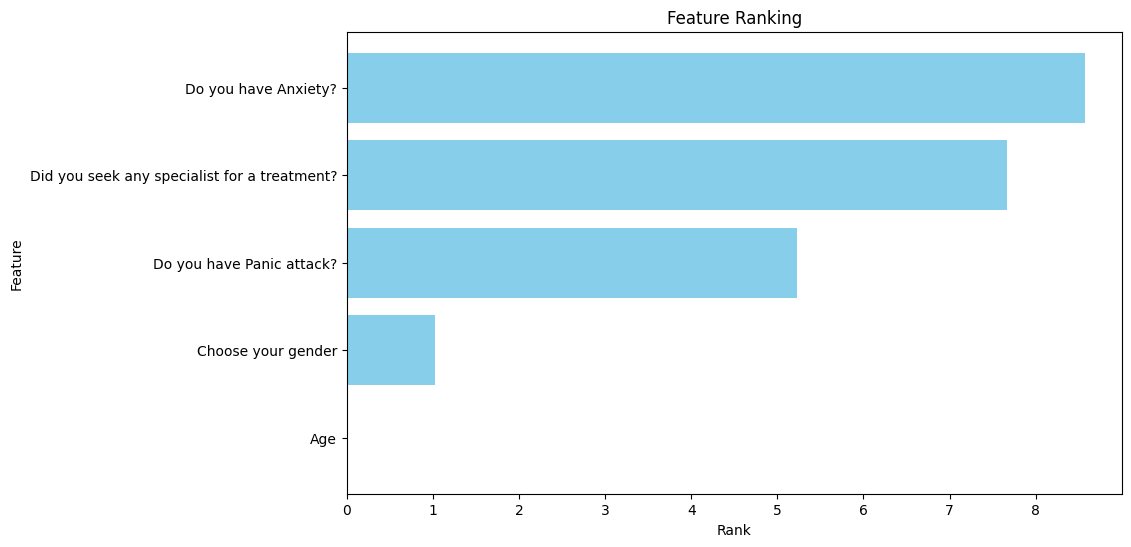

In [54]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k='all')

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Grafik ini mengurutkan berbagai fitur berdasarkan signifikansinya, termasuk memiliki kecemasan, mencari perawatan khusus, mengalami serangan panik, pemilihan gender, dan usia.

#**Determain Next Step**

Dari langkah-langkah yang sudah dilakukan diatas dapat disimpulkan

1. **Evaluasi Klasifikasi**:
   - kita telah melakukan evaluasi klasifikasi menggunakan berbagai metrik performa (seperti akurasi, presisi, dan recall).
   - Model-model yang diuji termasuk Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree Classifier.

2. **Cross-Validation**:
   - kita melakukan cross-validation untuk memastikan bahwa model dapat digeneralisasi dengan baik ke data yang belum pernah dilihat sebelumnya.
   - Ini membantu menghindari *overfitting* dan memastikan performa yang konsisten.

3. **Tuning Hyperparameter**:

   Lalu kita juga telah menyetel hiperparameter model untuk meningkatkan performa untuk terus memastikan eksplorasi hiperparameter dan memastikan model optimal.

4. **Seleksi Fitur**:

   Kita melakukan seleksi fitur untuk memilih subset fitur yang paling relevan. Fitur-fitur yang dipilih memiliki dampak signifikan pada performa model.